In [ ]:
# https://adventofcode.com/2018/day/10
import Plots

struct Beacon
    x::Int
    y::Int
    dx::Int
    dy::Int
end

function Beacon(line::String)::Beacon
    regex = r"position=<\s*(-?\d+),\s*(-?\d+)> velocity=<\s*(-?\d+),\s*(-?\d+)>"
    Beacon(parse.(Int, match(regex, line).captures)...)
end

data = open("10.txt") do file
    readlines(file) .|> Beacon
end


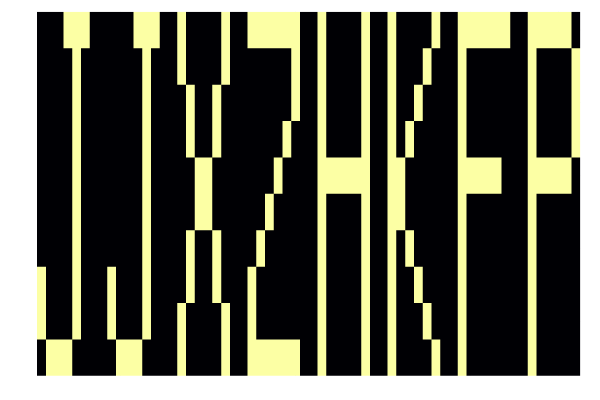

In [70]:
# part 1

beacons = data

minbeacons = beacons
minentropy = 1e6
mintimer = 0

for timer in 1:1000000
    # run a step of the simulation
    beacons = [Beacon(b.x + b.dx, b.y + b.dy, b.dx, b.dy) for b in beacons]
    
    # compute a measure of the entropy of the beacons,
    # based on the number of non-collinear points
    entropy = length([unique(b.x for b in beacons); 
                      unique(b.y for b in beacons)])
    
    # entropy should decrease to a minimum
    # and then begin rising again
    # ignore noise within a tolerance
    if entropy < minentropy
        minbeacons = beacons
        minentropy = entropy
        mintimer = timer
    elseif entropy > minentropy + 100
        break
    end
end

# render the minimum entropy image
beacons = minbeacons
minx = minimum(b.x for b in beacons)
miny = minimum(b.y for b in beacons)

image = zeros(Int,
              maximum(b.x for b in beacons) - minx + 1,
              maximum(b.y for b in beacons) - miny + 1)
for b in beacons
    image[b.x - minx + 1, b.y - miny + 1] = 1
end

Plots.heatmap(1:size(image, 1), 
              1:size(image, 2), 
              reverse(transpose(image), dims=1), 
              legend=false, 
              xaxis=false, 
              yaxis=false)


In [64]:
# part 2

mintimer

10036